In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
df = pd.read_csv('cleaned.csv')
df0 = df
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635 entries, 0 to 1634
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    1635 non-null   datetime64[ns]
 1   Total Generated (MW)    1635 non-null   int64         
 2   Maximum Demand (MW)     1635 non-null   int64         
 3   SR at Peak Demand (MW)  1635 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 51.2 KB


In [3]:
df.index

RangeIndex(start=0, stop=1635, step=1)

In [4]:
df.describe()  #show the description for the dataframe variables

,Total Generated (MW),Maximum Demand (MW),SR at Peak Demand (MW)
count,1635.000000,1635.000000,1635.000000
mean,20059.615902,15921.438532,1367.200612
std,1544.460682,3013.111804,350.589851
min,1855.000000,1399.000000,407.000000
25%,19140.000000,15002.500000,1178.000000
50%,20179.000000,16148.000000,1334.000000
75%,21059.000000,16905.500000,1527.000000
max,26699.000000,117286.000000,8871.000000


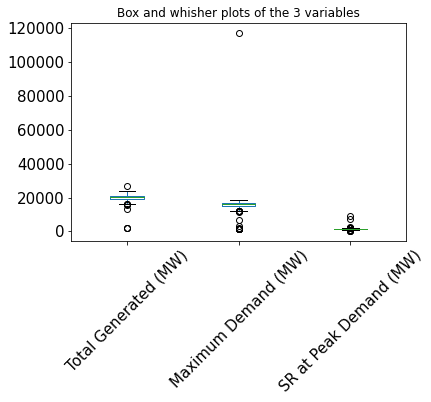

In [5]:

boxplot = df.boxplot(column=['Total Generated (MW)','Maximum Demand (MW)','SR at Peak Demand (MW)'],grid=False, rot=45, fontsize=15)
plt.title('Box and whisher plots of the 3 variables')
plt.show()

Text(0.5, 1.0, 'Histogram of Total Generated (MW)')

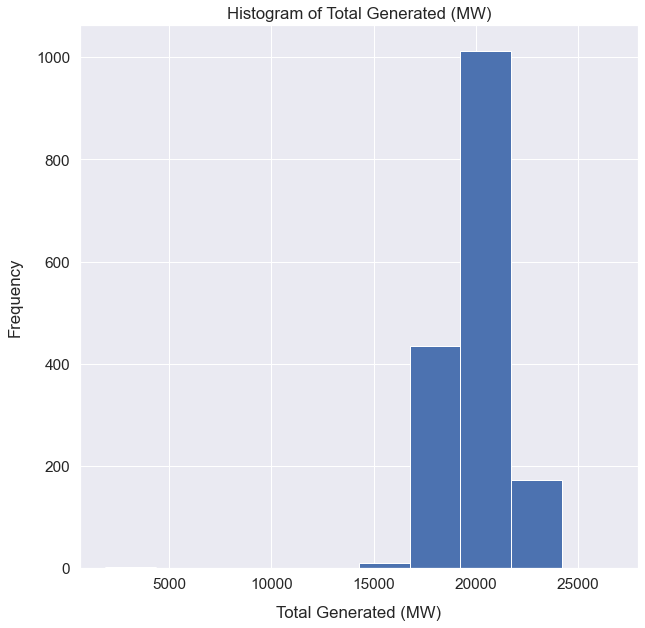

In [6]:
sns.set(font_scale=1.4)
df['Total Generated (MW)'].plot(kind='hist', figsize=(10, 10));
plt.xlabel("Total Generated (MW)", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
plt.title('Histogram of Total Generated (MW)')

Text(0.5, 1.0, 'Histogram of Maximum Demand (MW)')

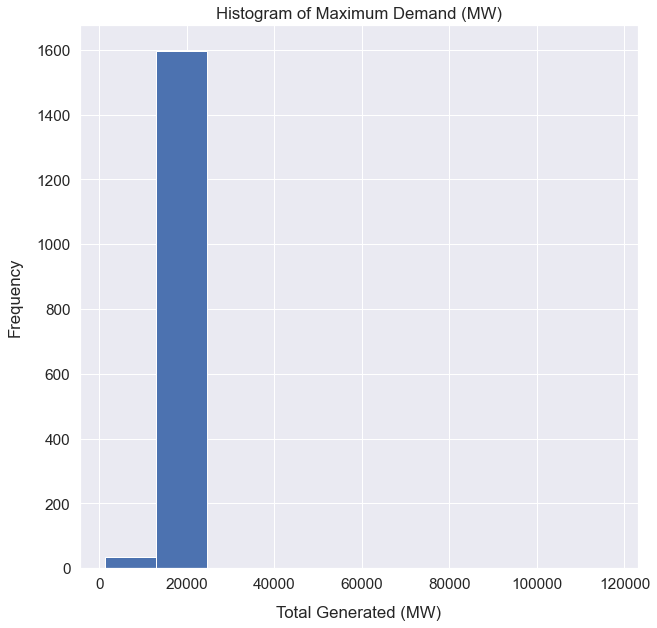

In [7]:
sns.set(font_scale=1.4)
df['Maximum Demand (MW)'].plot(kind='hist', figsize=(10, 10));
plt.xlabel("Total Generated (MW)", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
plt.title('Histogram of Maximum Demand (MW)')

Text(0.5, 1.0, 'Histogram of SR at Peak Demand (MW)')

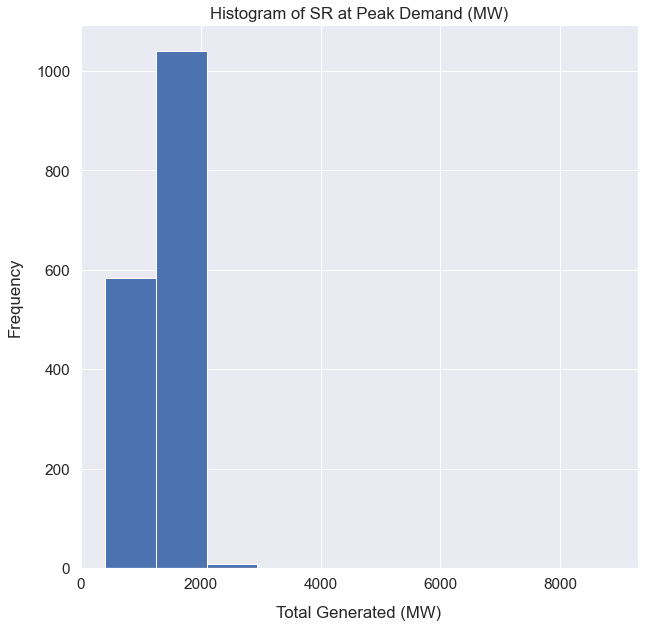

In [8]:
sns.set(font_scale=1.4)
df['SR at Peak Demand (MW)'].plot(kind='hist', figsize=(10, 10));
plt.xlabel("Total Generated (MW)", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
plt.title('Histogram of SR at Peak Demand (MW)')

Text(0.5, 1.0, 'Correlation heatmap of the 3 variables')

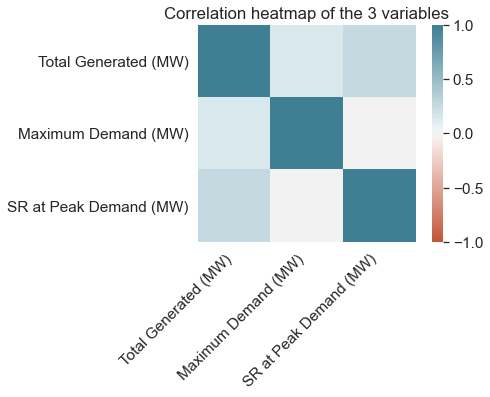

In [9]:
data = df[['Total Generated (MW)','Maximum Demand (MW)','SR at Peak Demand (MW)']]
corr = data.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set_title('Correlation heatmap of the 3 variables')

In [10]:
df.dtypes

Date                      datetime64[ns]
Total Generated (MW)               int64
Maximum Demand (MW)                int64
SR at Peak Demand (MW)             int64
dtype: object

In [11]:
#convert object type to Date type
 #convert object type to Date type
df['Date'] =  pd.to_datetime(df['Date'],format='%Y-%m-%d')

In [12]:
df.dtypes

Date                      datetime64[ns]
Total Generated (MW)               int64
Maximum Demand (MW)                int64
SR at Peak Demand (MW)             int64
dtype: object

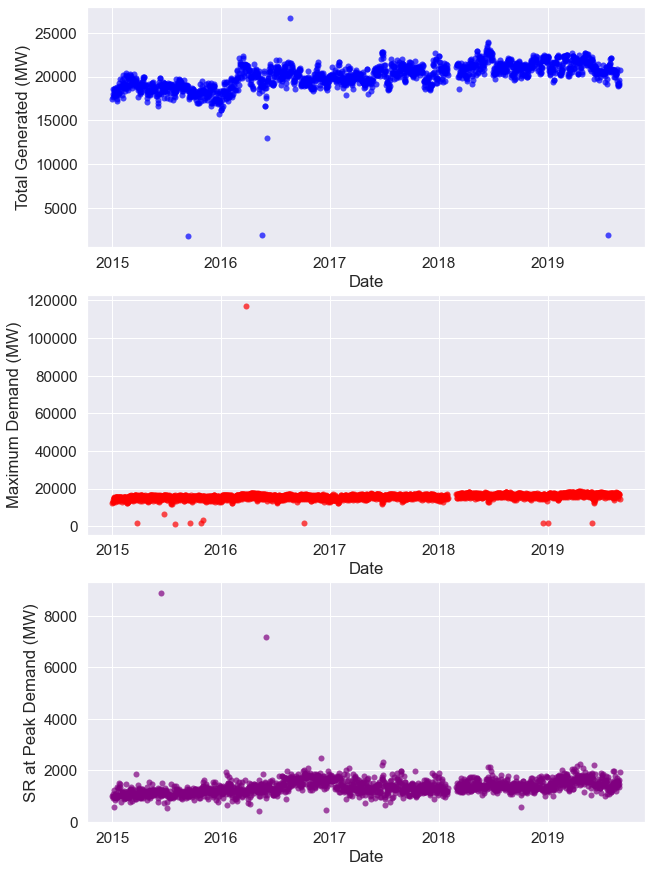

In [13]:
fig, ax = plt.subplots(3, figsize=(10, 15))
ax[0].scatter(x = df['Date'], y = df['Total Generated (MW)'],linewidths = 0.02, alpha = 0.7, color = "blue", edgecolors = None)
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Total Generated (MW)")

ax[1].scatter(x = df['Date'], y = df['Maximum Demand (MW)'],linewidths = 0.02, alpha = 0.7, color = "red", edgecolors = None)
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Maximum Demand (MW)")

ax[2].scatter(x = df['Date'], y = df['SR at Peak Demand (MW)'],linewidths = 0.02, alpha = 0.7, color = "purple", edgecolors = None)
ax[2].set_xlabel("Date")
ax[2].set_ylabel("SR at Peak Demand (MW)")

plt.show()

As shown by the time series plots above, the Total Generated (MW) and SR at Peak Demand (MW) are increasing insignificantly from 2015 to 2019. While the Maximum Demand (MW) remains consistantly from 2015 to 2019. There are outliers at times for all the 3 variables aforementioned.


Task 6

Time Series Decomposition for 'Total Generated (MW)' for both additive and multiplicative models

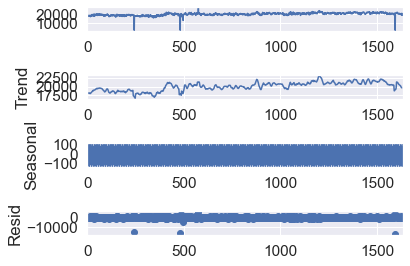

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
df1 = df[['Total Generated (MW)']]
result = seasonal_decompose(df1, model='additive', period = 12)
result.plot()
pyplot.show()

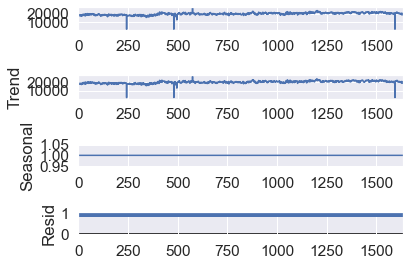

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
df1 = df[['Total Generated (MW)']]
result = seasonal_decompose(df1, model='multiplicative', period = 1)
result.plot()
pyplot.show()

Time Series Decomposition for 'Maximum Demand (MW)' for both additive and multiplicative models

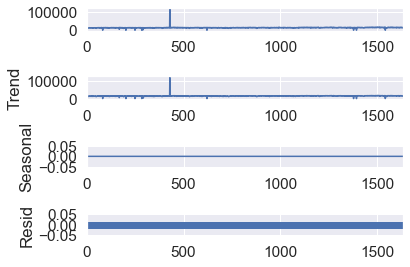

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
df2 = df[['Maximum Demand (MW)']]
result = seasonal_decompose(df2, model='additive', period = 1)
result.plot()
pyplot.show()

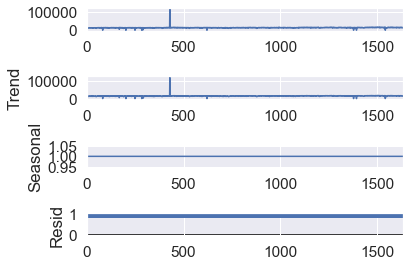

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
df2 = df[['Maximum Demand (MW)']]
result = seasonal_decompose(df2, model='multiplicative', period = 1)
result.plot()
pyplot.show()

Time Series Decomposition for 'SR at Peak Demand (MW)' for both additive and multiplicative models

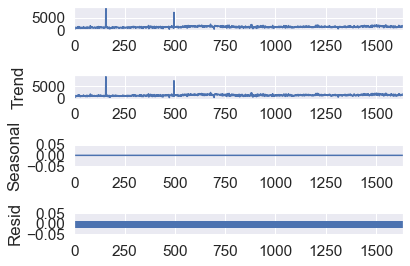

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
df3 = df[['SR at Peak Demand (MW)']]
result = seasonal_decompose(df3, model='additive', period = 1)
result.plot()
pyplot.show()

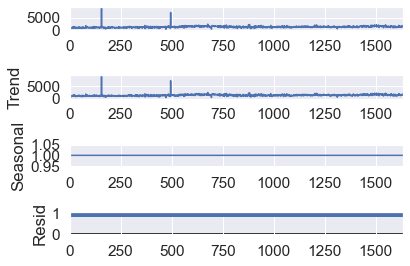

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
df3 = df[['SR at Peak Demand (MW)']]
result = seasonal_decompose(df3, model='multiplicative', period = 1)
result.plot()
pyplot.show()

From the decomposition of the time series results, the models additive and multiplicative have 
similar results for trend but different results for seasonality and residual. The seasonality and residual for additive models are 0 but the seasonality and residual for additive models are 1. The obeserved datas have similar results as the trends shown.

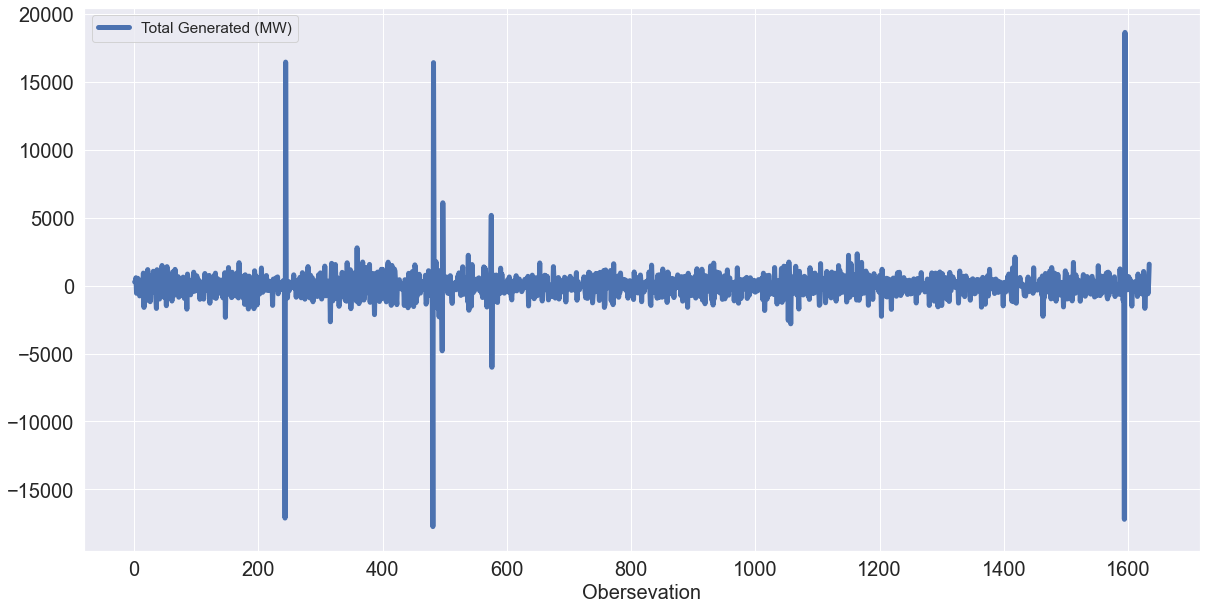

In [20]:
df1.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Obersevation', fontsize=20);

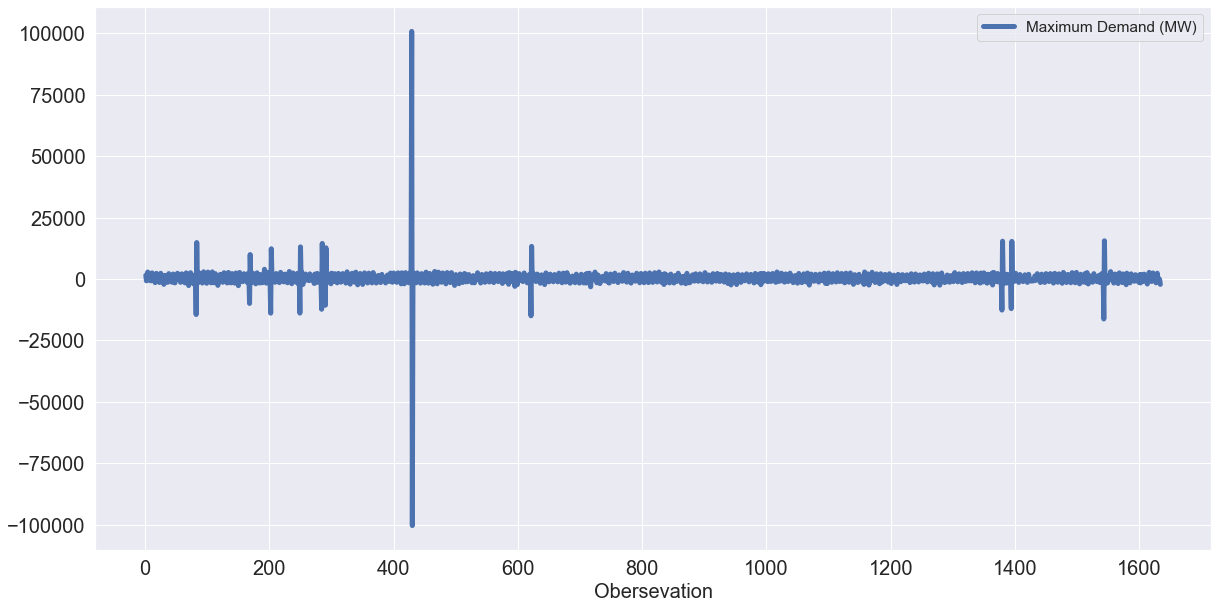

In [21]:
df2.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Obersevation', fontsize=20);

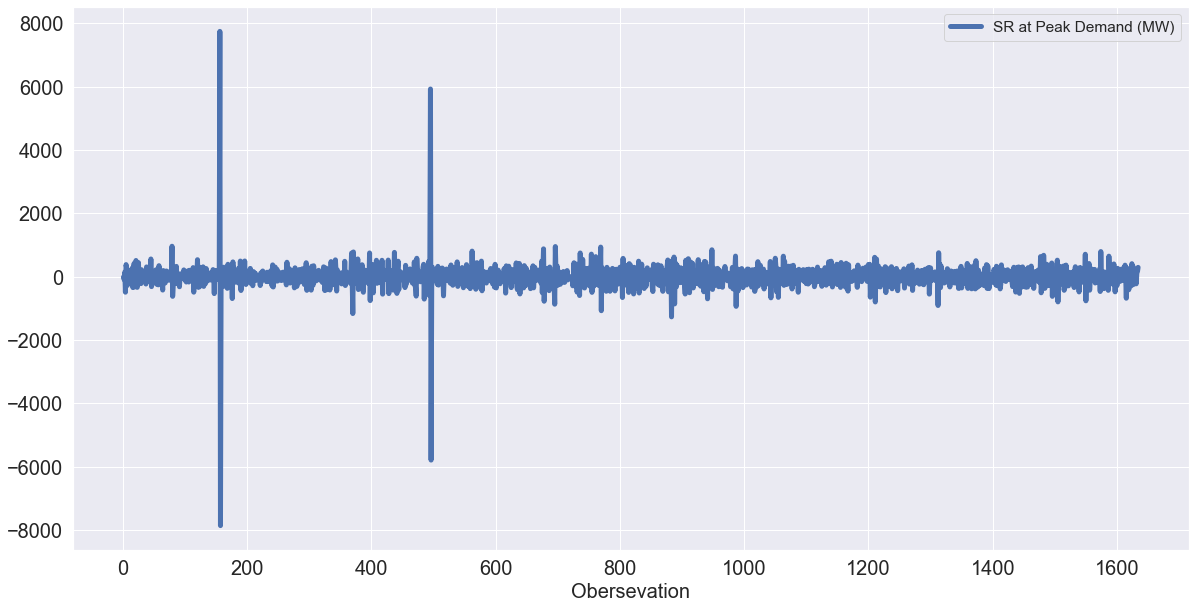

In [22]:
df3.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Obersevation', fontsize=20);

Use autocorrelation to determine the best lag value

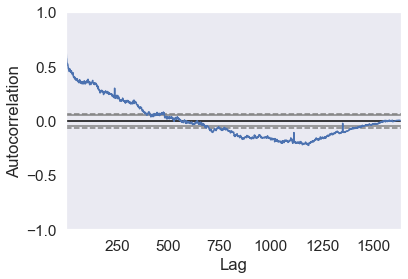

In [23]:
pd.plotting.autocorrelation_plot(df1);

The best lag value for 'Total Generated (MW)' should be 1

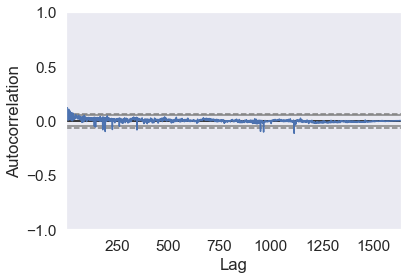

In [24]:
pd.plotting.autocorrelation_plot(df2);

There might be a few best lag values for 'Maximum Demand (MW)'.

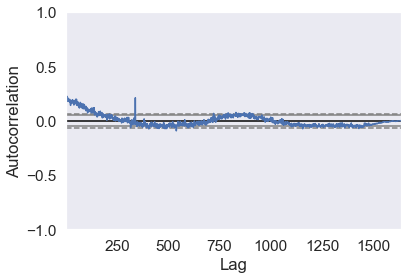

In [25]:
pd.plotting.autocorrelation_plot(df3);

The best lag value for 'SR at Peak Demand (MW)' should be 1

Using Auto Regression model for prediction

Test RMSE: 269.514


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


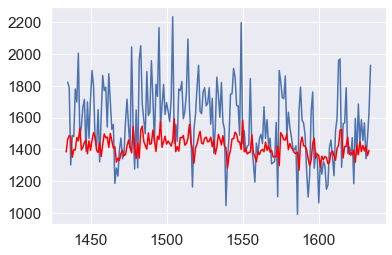

In [26]:
X=df[['SR at Peak Demand (MW)']]
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from random import random
from math import sqrt
train_data = X[1:len(X)-200]
test_data = X[len(X)-200:]
#train the autoregression model
model = AutoReg(X, lags=1)
model_fitted = model.fit()


# make predictions 
predictions = model_fitted.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)
rmse = sqrt(mean_squared_error(test_data, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test_data)
pyplot.plot(predictions, color='red')
pyplot.show()
# create a comparison dataframe

Test RMSE: 279.245


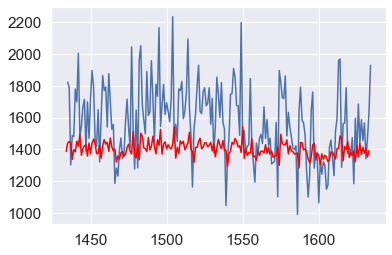

In [27]:
train_data = X[1:len(X)-200]
test_data = X[len(X)-200:]

#using Moving Average(MA) regression
model = ARIMA(X, order=(0, 0, 1))
model_fitted = model.fit()
# make predictions 
predictions = model_fitted.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)
rmse = sqrt(mean_squared_error(test_data, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test_data)
pyplot.plot(predictions, color='red')
pyplot.show()
# create a comparison dataframe

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test RMSE: 223.939


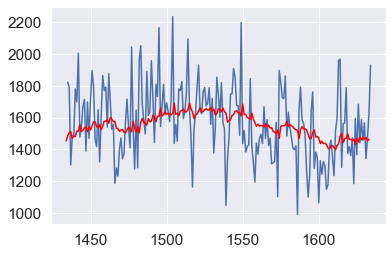

In [28]:
train_data = X[1:len(X)-200]
test_data = X[len(X)-200:]

#autoregressive–moving-average regression model
model = ARIMA(X, order=(2, 0, 1))
model_fitted = model.fit()
# make predictions 
predictions = model_fitted.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)
rmse = sqrt(mean_squared_error(test_data, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test_data)
pyplot.plot(predictions, color='red')
pyplot.show()
# create a comparison dataframe

Perform 2-wat hypothesis test

In [29]:
oldDF = df[:300]
newDF = df[-300:]
oldDFvar1 = oldDF[['Total Generated (MW)']]
oldDFvar2 = oldDF[['Maximum Demand (MW)']]
oldDFvar3 = oldDF[['SR at Peak Demand (MW)']]
newDFvar1 = newDF[['Total Generated (MW)']]
newDFvar2 = newDF[['Maximum Demand (MW)']]
newDFvar3 = newDF[['SR at Peak Demand (MW)']]

In [30]:
from scipy.stats import ttest_ind
import numpy as np
ttest,pval = ttest_ind(oldDFvar1,newDFvar1)
print("p-value for 'Total Generated (MW)'",pval)
if pval <0.05:
  print("Null hypothesis rejected")
else:
  print("Null hypothesis accepted")

p-value for 'Total Generated (MW)' [8.8012614e-90]
Null hypothesis rejected


In [31]:
from scipy.stats import ttest_ind
import numpy as np
ttest,pval = ttest_ind(oldDFvar2,newDFvar2)
print("p-value for 'Maximum Demand (MW)",pval)
if pval <0.05:
  print("Null hypothesis rejected")
else:
  print("Null hypothesis accepted")

p-value for 'Maximum Demand (MW) [2.70953566e-20]
Null hypothesis rejected


In [32]:
from scipy.stats import ttest_ind
import numpy as np
ttest,pval = ttest_ind(oldDFvar3,newDFvar3)
print("p-value for 'SR at Peak Demand (MW)'",pval)
if pval <0.05:
  print("Null hypothesis rejected")
else:
  print("Null hypothesis accepted")

p-value for 'SR at Peak Demand (MW)' [4.07679226e-32]
Null hypothesis rejected


By performing additional 2-way t testing, we can show that the 3 variables's values have changed from 2015 to 2019 as alternative hypotheses are rejected. This scenario was shown via the time series plots beforehand with Total Generated (MW) and SR at Peak Demand (MW) have increased. This might due to the reason that the advancement of technology has given rise to a lot of electronic prodcuts, indirectly causing the consumption of energy to increase. Moreover, the ARMA regression model performs well by having the lowest root-mean-squared-errors. 

In [38]:

import joblib #dump the trained model
joblib.dump(model_fitted, 'model.pkl')

['model.pkl']